# Support Vector Machine

##### Kelompok Terserah : 

| Nama                       | NRP        |
| -------------------------- | ---------- |
| Muhammad Abrol AL Qushoyyi | 5025201028 |
| Moh. Ilham Fakhri Zamzami  | 5025201275 |
| Arief Badrus Sholeh        | 5025201228 |

##### Dataset

Dataset yang digunakan adalah dataset untuk tinggi dan berat badan pria dan wanita

https://www.kaggle.com/datasets/saranpannasuriyaporn/male-female-height-and-weight

https://www.kaggle.com/code/prashant111/svm-classifier-tutorial#12.-Run-SVM-with-default-hyperparameters-

##### 1. Import library & dataset


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

: 

In [85]:
data = './male_female_height_weight.csv'

df = pd.read_csv(data)

##### 2. Data Analysis

In [86]:
# view dimensions of dataset

df.shape

(3000, 3)

In [87]:
# let's preview the dataset

df.head()

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male


In [88]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3000 non-null   float64
 1   Weight  3000 non-null   float64
 2   Sex     3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.4+ KB


In [89]:
# check for missing values in variables

df.isnull().sum()

Height    0
Weight    0
Sex       0
dtype: int64

- Terdapat total 3 variabel pada dataset
- 2 numerical variabel `Weight` dan `Height`
- 1 categorical variabel `Sex`
- Tidak ada *missing values* pada variabel

__Checking outliers using box plot__

Text(0, 0.5, 'Height')

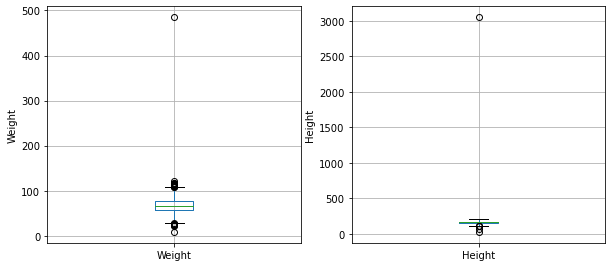

In [90]:
plt.figure(figsize=(10,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='Weight')
fig.set_title('')
fig.set_ylabel('Weight')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='Height')
fig.set_title('')
fig.set_ylabel('Height')

##### 3. Declare Feature Vector and Target Variable

In [91]:
X = df.drop(['Sex'], axis=1)

y = df['Sex']

__Convert categorical variable into integers__

In [92]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

##### 4. Split Data

In [93]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# check the shape of X_train and X_test

X_train.shape, X_test.shape

((2400, 2), (600, 2))

##### 5. Feature Scalling

In [94]:
cols = X_train.columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [95]:
X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

X_train.describe()

,Height,Weight
count,2400.000000,2400.000000
mean,0.044974,0.125906
std,0.020151,0.036932
min,0.000000,0.000000
25%,0.040947,0.103296
50%,0.044799,0.123974
75%,0.048311,0.146347
max,1.000000,1.000000


##### 6. SVM with RBL Kernel

In [96]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

__C=1.0, kernel=rbf__

In [97]:
# instantiate classifier with default hyperparameters
svc=SVC(kernel='rbf', C=1.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8683


__C=100.0, kernel=rbf__

In [98]:
svc=SVC(kernel='rbf', C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8583


##### 7. SVM with linear kernel

__C=1.0, kernel=linear__

In [99]:
svc=SVC(kernel='linear', C=1.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6983


__C=100.0, kernel=linear__

In [100]:
svc=SVC(kernel='linear', C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8500


__C=1000.0, kernel=linear__

In [101]:
svc=SVC(kernel='linear', C=1000.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8600


##### 8. SVM with Polynomial Kernel

__C=1.0, kernel=poly__

In [102]:
svc=SVC(kernel='poly', C=1.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8567


__C=100.0, kernel=poly__

In [103]:
svc=SVC(kernel='poly', C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8567


##### 9. SVM with RBL Sigmoid

__C=1.0, kernel=sigmoid__

In [104]:
svc=SVC(kernel='sigmoid', C=1.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7117


__C=100.0, kernel=sigmoid__

In [105]:
svc=SVC(kernel='sigmoid', C=100.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7067


#### 10. Explorasi *Confussion Matrix*

<AxesSubplot:>

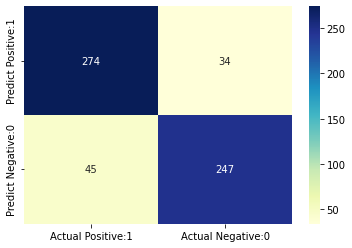

In [107]:
svc=SVC(kernel='rbf', C=1.0) 

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

__Classification accuracy__

In [109]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8683


__Classification error__

In [110]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1317


__Precision__

In [111]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8896


#### Kesimpulan

- Dataset tidak terlalu banyak memiliki data outlier (berdasarkan boxplot), sehingga dengan menaikkan nilai c, akurasinya menurun. Ini benar pada sebagian besar jenis kernel.
- Berdasarkan hasil permodelan SVM tadi, kami mendapatkan nilai akurasi maksimal pada kernel `rbf` dengan `c=0.1.0` yaitu `0.8683`.   